In [85]:
# Load dependencies:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as sklearnPCA

us_arrests_url = 'https://forge.scilab.org/index.php/p/rdataset/source/file/master/csv/datasets/USArrests.csv'
dataset = pd.read_csv(us_arrests_url)
print(dataset)


        Unnamed: 0  Murder  Assault  UrbanPop  Rape
0          Alabama    13.2      236        58  21.2
1           Alaska    10.0      263        48  44.5
2          Arizona     8.1      294        80  31.0
3         Arkansas     8.8      190        50  19.5
4       California     9.0      276        91  40.6
5         Colorado     7.9      204        78  38.7
6      Connecticut     3.3      110        77  11.1
7         Delaware     5.9      238        72  15.8
8          Florida    15.4      335        80  31.9
9          Georgia    17.4      211        60  25.8
10          Hawaii     5.3       46        83  20.2
11           Idaho     2.6      120        54  14.2
12        Illinois    10.4      249        83  24.0
13         Indiana     7.2      113        65  21.0
14            Iowa     2.2       56        57  11.3
15          Kansas     6.0      115        66  18.0
16        Kentucky     9.7      109        52  16.3
17       Louisiana    15.4      249        66  22.2
18          

Murder column mean and std: 7.787999999999999 4.355509764209288
Assault column mean and std: 170.76 83.33766084001708
UrbanPop column mean and std: 65.54 14.474763400836784
Rape column mean and std: 21.231999999999992 9.366384531059648

Standardized (50, 4) :
Murder  column mean and std: -7.105427357601002e-17 1.0
Assault  column mean and std: 1.3877787807814457e-16 1.0
UrbanPop  column mean and std: -4.39648317751562e-16 1.0
Rape  column mean and std: 8.593126210598712e-16 0.9999999999999999

mean vec: [-7.10542736e-17  1.38777878e-16 -4.39648318e-16  8.59312621e-16]

X_std.T.shape: (4, 50)
cov_mat.shape: (4, 4)
cov_mat:
 [[1.02040816 0.81823807 0.07099247 0.57508044]
 [0.81823807 1.02040816 0.2641548  0.67881758]
 [0.07099247 0.2641548  1.02040816 0.41973595]
 [0.57508044 0.67881758 0.41973595 1.02040816]]

Eigenvectors  (4, 4) :
[[ 0.53589947  0.58318363  0.27819087  0.54343209]
 [ 0.41818087  0.1879856  -0.87280619 -0.16731864]
 [ 0.6492278  -0.74340748  0.13387773  0.08902432]
 [-

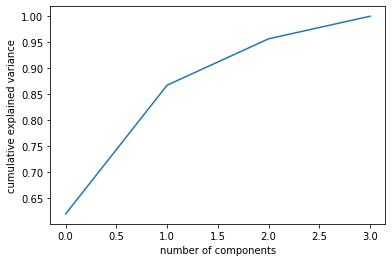

In [86]:
num_cols = dataset.iloc[:, 1:]
for (col_name, col_data) in num_cols.iteritems():
  print(col_name, "column mean and std:", 
        col_data.mean(), col_data.std())
print()

# Нормализация:
# набор данных с нулевым средним значением по столбцам данных и стандартным отклонением 1.
X_std = StandardScaler().fit_transform(numericColumns)

# mean, используя библиотеки sklearn:
print("Standardized", X_std.shape,":")
for i in range(X_std.shape[1]): # X_std.shape[1] -- для каждого столбца.
  print(num_cols.columns[i], " column mean and std:", X_std[:,i].mean(), X_std[:,i].std())
print()

# mean, используя библиотеки numpy:
mean_vec = np.mean(X_std, axis=0)
print("mean vec:", mean_vec)
print()

print('X_std.T.shape:', X_std.T.shape)  # check shape before finding cov mat
cov_mat = np.cov(X_std.T)
print('cov_mat.shape:', cov_mat.shape)
print('cov_mat:\n', cov_mat)
print()

# Спектральное разложение ков. матрицы (eigendecomposition):
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors ', eig_vecs.shape, ":")
print(eig_vecs.T)  # векторы -- это строки матрицы eig_vecs.T
print('Eigenvalues ', eig_vals.shape, ":")
print(eig_vals)
print()

# Убедитесь, что главные компоненты, вычисленные методом fit() класса PCA библиотеки sklearn 
# совпадают с собственными векторами ковариационной матрицы, 
# а объясненная дисперсия главных компонент совпадает с собственными значениями матрицы.

# Explained variance:
pca = sklearnPCA().fit(X_std)                                       # Выполнение PCA – вычисление компонент.
print("sklearn PCA components:\n", pca.components_)                 # The components are sorted by explained_variance_.
print("sklearn PCA explained_variance_:", pca.explained_variance_)
print("sklearn PCA explained_variance_ratio_:", pca.explained_variance_ratio_)
print()

# Проанализируйте построенный график суммарной объясненной дисперсии главных компонент. 
# Какую долю дисперсии объясняют суммарно первые две главные компоненты?

# Промежуточная сумма – это сумма последовательности чисел, 
# которая обновляется каждый раз, когда новое число добавляется к последовательности, 
# увеличивая предыдущую промежуточную сумму на величину нового значения.
#
# Смысл промежуточной суммы двояк: 
# * во-первых, она позволяет видеть сумму последовательности для каждого шага, 
#   не совершая лишних действий со всей последовательностью;
# * во-вторых, промежуточная сумма даёт возможность не записывать саму последовательность, 
#   если конкретные её значения не имеют важности.
print('cumulative sum of exp. var. ratio: ', np.cumsum(pca.explained_variance_ratio_))
print()

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
